### TEL354 - Minería de datos
# Taller 4

Nombre: Pedro Arce Cisternas

**Objetivo:** Analizar las palabras más frecuentes de los últimos *tweets* y *retweets* de alguna cuenta en español y clasificarlos de acuerdo a su polaridad usando NLP.

In [1]:
import pandas as pd

1. Elegir un archivo disponible de *tweets*, cargar los datos en un DataFrame y mostrarlo.

In [2]:
tweets_data = pd.read_csv('Metro.csv')
tweets_data

,type,text
0,Reply,@_GabyLobos_ ❤️❤️❤️❤️❤️❤️
1,Tweet,Descarga nuestra aplicación 📱oficial de Metro ...
2,Reply,@KarenFu05328984 @whoisfraaaan @rchirinokarate...
3,Reply,@whoisfraaaan @KarenFu05328984 @rchirinokarate...
4,Reply,@FreeDomLesS1 @rchirinokarate Vamos a revisar ...
...,...,...
995,Reply,"@camipimentelr Cami, sentimos lo ocurrido. Vam..."
996,Tweet,"18:00 HRS. 📢Atención, iniciamos la Hora Punta ..."
997,Reply,"@queuputriparker Hola, estaremos informando"
998,Reply,@DomGo82671482 @InstagramComms 👍🏻


2. Instalar la librería `pysentimiento`.

In [3]:
pip install pysentimiento

Note: you may need to restart the kernel to use updated packages.


3. Para cada tweet predecir la polaridad `POS`, `NEU`, `NEG` usando la función `create_analyzer` y agregar este valor al DataFrame en una nueva columna.

In [4]:
from pysentimiento import create_analyzer

In [5]:
analyzer = create_analyzer(task="sentiment", lang="es")
polaridades = []

for i in range(len(tweets_data)):
    polaridades.append(analyzer.predict(tweets_data.iloc[i]['text']))
    
tweets_data['polaridad'] = polaridades

In [24]:
pd.options.display.max_colwidth = 75
tweets_data

,type,text,polaridad
0,Reply,@_GabyLobos_ ❤️❤️❤️❤️❤️❤️,"AnalyzerOutput(output=NEU, probas={NEU: 0.591, POS: 0.214, NEG: 0.194})"
1,Tweet,Descarga nuestra aplicación 📱oficial de Metro y recibe notificaciones a...,"AnalyzerOutput(output=NEU, probas={NEU: 0.772, POS: 0.157, NEG: 0.070})"
2,Reply,"@KarenFu05328984 @whoisfraaaan @rchirinokarate Karen, dimos aviso de to...","AnalyzerOutput(output=NEU, probas={NEU: 0.781, POS: 0.115, NEG: 0.104})"
3,Reply,"@whoisfraaaan @KarenFu05328984 @rchirinokarate Fran, lamentamos este in...","AnalyzerOutput(output=NEU, probas={NEU: 0.735, NEG: 0.144, POS: 0.121})"
4,Reply,@FreeDomLesS1 @rchirinokarate Vamos a revisar esto con el personal. Lam...,"AnalyzerOutput(output=NEU, probas={NEU: 0.781, POS: 0.124, NEG: 0.095})"
...,...,...,...
995,Reply,"@camipimentelr Cami, sentimos lo ocurrido. Vamos a revisar esto con el ...","AnalyzerOutput(output=NEU, probas={NEU: 0.770, POS: 0.137, NEG: 0.093})"
996,Tweet,"18:00 HRS. 📢Atención, iniciamos la Hora Punta con #TodaLaRed disponible...","AnalyzerOutput(output=NEU, probas={NEU: 0.793, POS: 0.137, NEG: 0.070})"
997,Reply,"@queuputriparker Hola, estaremos informando","AnalyzerOutput(output=NEU, probas={NEU: 0.684, POS: 0.291, NEG: 0.025})"
998,Reply,@DomGo82671482 @InstagramComms 👍🏻,"AnalyzerOutput(output=NEU, probas={NEU: 0.785, POS: 0.173, NEG: 0.041})"


4. Transforme a minúsculas, elimine puntuación, símbolos, emojis y filtre palabras "stopwords" del idioma español en todos los tweets. 

Ayuda: Puede usar expresiones regulares como `[^\w\s]` para eliminar puntuación y la siguiente lista de stopwords: `nltk.corpus.stopwords.words`. 

De forma adicional, si desea agregar otra palabra a la lista de stopwords, realizar alguna otra normalización o limpieza sobre los datos, está permitido.

In [7]:
import nltk

In [8]:
import re

In [30]:
from nltk.corpus import stopwords

In [31]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar puntuación y símbolos
    texto = re.sub(r"[^\w\s]", "", texto)
    
    # Eliminar emojis
    texto = texto.encode("ascii", "ignore").decode("utf-8")
    
    # Filtrar stopwords
    stopwords_es = stopwords.words("spanish")
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_es]
    
    # Unir las palabras nuevamente
    texto_limpio = " ".join(palabras_filtradas)
    
    return texto_limpio

tweets_limpios = []

for i in range(len(tweets_data)):
    tweets_limpios.append(limpiar_texto(tweets_data.iloc[i]['text']))

tweets_data['text'] = tweets_limpios
tweets_data

,type,text,polaridad
0,Reply,_gabylobos_,"AnalyzerOutput(output=NEU, probas={NEU: 0.591, POS: 0.214, NEG: 0.194})"
1,Tweet,descarga aplicacin oficial metro recibe notificaciones instante acerca ...,"AnalyzerOutput(output=NEU, probas={NEU: 0.772, POS: 0.157, NEG: 0.070})"
2,Reply,karenfu05328984 whoisfraaaan rchirinokarate karen dimos aviso ocurrido ...,"AnalyzerOutput(output=NEU, probas={NEU: 0.781, POS: 0.115, NEG: 0.104})"
3,Reply,whoisfraaaan karenfu05328984 rchirinokarate fran lamentamos inconvenien...,"AnalyzerOutput(output=NEU, probas={NEU: 0.735, NEG: 0.144, POS: 0.121})"
4,Reply,freedomless1 rchirinokarate vamos revisar personal lamentamos inconveni...,"AnalyzerOutput(output=NEU, probas={NEU: 0.781, POS: 0.124, NEG: 0.095})"
...,...,...,...
995,Reply,camipimentelr cami sentimos ocurrido vamos revisar rea cargo slds,"AnalyzerOutput(output=NEU, probas={NEU: 0.770, POS: 0.137, NEG: 0.093})"
996,Tweet,1800 hrs atencin iniciamos hora punta todalared disponible recuerda seg...,"AnalyzerOutput(output=NEU, probas={NEU: 0.793, POS: 0.137, NEG: 0.070})"
997,Reply,queuputriparker hola informando,"AnalyzerOutput(output=NEU, probas={NEU: 0.684, POS: 0.291, NEG: 0.025})"
998,Reply,domgo82671482 instagramcomms,"AnalyzerOutput(output=NEU, probas={NEU: 0.785, POS: 0.173, NEG: 0.041})"


5. Instalar la librería `Wordcloud`.

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


6. Generar una nube de palabras para los mensajes con polaridad positiva `POS` y otra para los mensajes con polaridad negativa `NEG`. Asigne un `colormap` de color diferente para cada polaridad (Por ejemplo, rojo y azul). Muestre ambos gráficos en una misma fila, uno al lado del otro usando `subplots`.

In [11]:
from wordcloud import WordCloud

In [12]:
import matplotlib.pyplot as plt

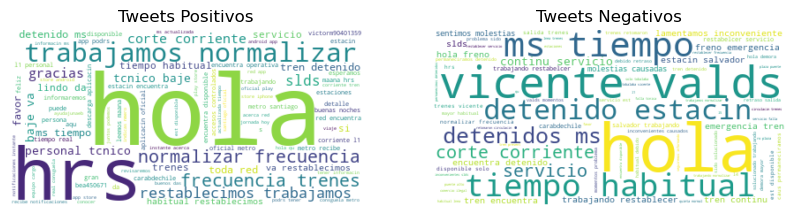

In [66]:
positivas = []
negativas = []

for i in range(len(tweets_data)):
    analisis = tweets_data.iloc[i]['polaridad']
    lista = str(analisis).split('POS: ')
    pos = lista[1][0:5]
    positivas.append(pos)
    lista = str(analisis).split('NEG: ')
    neg = lista[1][0:5]
    negativas.append(neg)

mensajes_pos = []
mensajes_neg = []
    
for i in range(len(tweets_data)):
    if float(positivas[i]) > float(negativas[i]):
        mensajes_pos.append(tweets_data.iloc[i]['text'])
    elif float(positivas[i]) < float(negativas[i]):
        mensajes_neg.append(tweets_data.iloc[i]['text'])

wordcloud_pos = WordCloud(background_color='white').generate(' '.join(mensajes_pos))
wordcloud_neg = WordCloud(background_color='white').generate(' '.join(mensajes_neg))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Tweets Positivos')
axes[0].axis('off')
axes[1].imshow(wordcloud_neg, interpolation='bilinear', cmap='Reds')
axes[1].set_title('Tweets Negativos')
axes[1].axis('off')
plt.subplots_adjust(wspace=0.2)
plt.show()

7. Analizar las palabras más representativas de cada nube. ¿Qué palabras usa con mayor frecuencia el usuario para expresar sentimientos negativos y cuáles para sentimientos positivos? ¿Hay palabras que están presentes en ambos sentimientos?

In [1]:
### En el caso de los tweets del metro, se pueden visualizar palabras cómo "normalizar", "restablecimos", "frecuencia", 
#### "gracias" para expresar sentimientos positivos, y palabras cómo "detenido", "corte corriente", "mas tiempo habitual", 
#### "emergencia" para expresar sentimientos negativos.
### Igualmente, en ambos sentimientos se puede ver presente como algo mas neutral un saludo ("hola").